In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/predicting-earnings-from-census-data/census.csv


In [2]:
data=pd.read_csv('../input/predicting-earnings-from-census-data/census.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
workclass        31978 non-null object
education        31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
sex              31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
over50k          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [4]:
#what is the num of obsvn in the dataset
#31978

In [5]:
data.shape[0]
#num of rows

31978

In [6]:
#num of columns
data.shape[1]

13

In [7]:
data.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'over50k'],
      dtype='object')

In [8]:
#how is the dataset indexed?
print(data.index)

RangeIndex(start=0, stop=31978, step=1)


In [9]:
data.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,over50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
data.age.mean()

38.579023078366376

In [11]:
data.age.median()

37.0

In [12]:
data.age.std()

13.662084643145844

In [13]:
data.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
over50k          0
dtype: int64

In [14]:
data.over50k.unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
def f(x):
    if x=='<=50K':
        return True
    if x=='>=50K':
        return False

In [16]:
#data.over50k=data.over50k.apply(f)

In [17]:
#data.over50k.value_counts()

In [18]:
data

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,over50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
31974,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
31975,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
31976,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


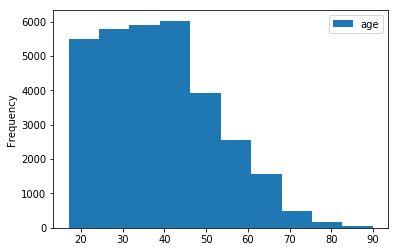

In [19]:
a=data[['age']]
a.plot(kind='hist')

In [20]:
data['sex'].value_counts()

 Male      21370
 Female    10608
Name: sex, dtype: int64

In [21]:
data['race'].value_counts()

 White                 27430
 Black                  3028
 Asian-Pac-Islander      956
 Amer-Indian-Eskimo      311
 Other                   253
Name: race, dtype: int64

In [22]:
data['maritalstatus'].value_counts()

 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64

In [23]:
data.hoursperweek.mean()

40.41784977171805

In [24]:
data.hoursperweek.median()

40.0

In [25]:
data.hoursperweek.max()

99

In [26]:
data.loc[data['hoursperweek']>=99]['race'].value_counts()

 White                 71
 Black                  7
 Asian-Pac-Islander     5
Name: race, dtype: int64

In [27]:
data.loc[data['hoursperweek']>=99]['sex'].value_counts()

 Male      66
 Female    17
Name: sex, dtype: int64

In [28]:
data.loc[data['hoursperweek']>=99]['over50k'].value_counts(['percentage'])

 <=50K    0.698795
 >50K     0.301205
Name: over50k, dtype: float64

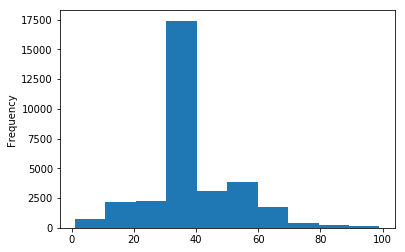

In [29]:
data['hoursperweek'].plot(kind='hist')

In [30]:
data.groupby(by=['sex'])['age'].mean()
#avg age by gender


sex
 Female    36.852564
 Male      39.436032
Name: age, dtype: float64

In [31]:
data.dtypes

age               int64
workclass        object
education        object
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
over50k          object
dtype: object

In [32]:
data.education.nunique()

16

In [33]:
data.capitalloss.nunique()

92

In [34]:
data.hoursperweek.describe()

count    31978.000000
mean        40.417850
std         12.345285
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hoursperweek, dtype: float64

In [35]:
data.age.describe()

count    31978.000000
mean        38.579023
std         13.662085
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [36]:
#what is the age with least occur
data.age.value_counts().tail()

83    6
85    3
88    3
87    1
86    1
Name: age, dtype: int64

In [37]:
data.hoursperweek.value_counts().tail()

92    1
94    1
87    1
74    1
82    1
Name: hoursperweek, dtype: int64

In [38]:
#what is the educational qualification of the highest num of working hours individual
data.sort_values(by='hoursperweek',ascending=False).head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,over50k
6490,27,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,<=50K
19376,34,Federal-gov,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,United-States,<=50K
18272,33,Self-emp-not-inc,Assoc-voc,Divorced,Other-service,Unmarried,White,Female,0,0,99,United-States,<=50K
21823,45,Private,Some-college,Divorced,Craft-repair,Unmarried,White,Male,0,0,99,United-States,<=50K
24900,65,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,99,United-States,<=50K


In [39]:
data.education.value_counts()

 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: education, dtype: int64

In [40]:
data.iloc[:,0:7]

,age,workclass,education,maritalstatus,occupation,relationship,race
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black
...,...,...,...,...,...,...,...
31973,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White
31974,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White
31975,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White
31976,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White


In [41]:
data.iloc[:,:-3]

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0
...,...,...,...,...,...,...,...,...,...,...
31973,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0
31974,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0
31975,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0
31976,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0


In [42]:
data[['capitalloss','capitalgain']]

,capitalloss,capitalgain
0,0,2174
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
31973,0,0
31974,0,0
31975,0,0
31976,0,0


In [43]:
data.iloc[2:7,2:6]

,education,maritalstatus,occupation,relationship
2,HS-grad,Divorced,Handlers-cleaners,Not-in-family
3,11th,Married-civ-spouse,Handlers-cleaners,Husband
4,Bachelors,Married-civ-spouse,Prof-specialty,Wife
5,Masters,Married-civ-spouse,Exec-managerial,Wife
6,9th,Married-spouse-absent,Other-service,Not-in-family


In [44]:
data.iloc[4:,:]

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,over50k
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
31974,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
31975,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
31976,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [45]:
data.iloc[:4,:]

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,over50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [46]:
data.iloc[:,2:7]

,education,maritalstatus,occupation,relationship,race
0,Bachelors,Never-married,Adm-clerical,Not-in-family,White
1,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White
2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White
3,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black
4,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black
...,...,...,...,...,...
31973,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White
31974,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White
31975,HS-grad,Widowed,Adm-clerical,Unmarried,White
31976,HS-grad,Never-married,Adm-clerical,Own-child,White


In [47]:
data[data.age>50]

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,over50k
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
20,54,Private,HS-grad,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
23,59,Private,HS-grad,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
24,56,Local-gov,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31959,72,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
31965,65,Self-emp-not-inc,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
31971,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
31975,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [48]:
#for each gender cat print the stat for hoursperweek and age
data.groupby('sex').age.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10608.0,36.852564,14.023131,17.0,25.0,35.0,46.0,90.0
Male,21370.0,39.436032,13.397222,17.0,29.0,38.0,48.0,90.0


In [49]:
data.groupby('sex').hoursperweek.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10608.0,36.394042,11.751556,1.0,30.0,40.0,40.0,99.0
Male,21370.0,42.415255,12.144441,1.0,40.0,40.0,49.0,99.0


In [50]:
data.groupby('workclass').age.mean()

workclass
 ?                   41.001658
 Federal-gov         42.577943
 Local-gov           41.743106
 Never-worked        20.571429
 Private             36.794355
 Self-emp-inc        46.027933
 Self-emp-not-inc    45.011605
 State-gov           39.362002
 Without-pay         47.785714
Name: age, dtype: float64

In [51]:
data.workclass.value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [52]:
def gen_to_num(x):
    if x=='Male':
        return 1
    if x=='Female':
        return 0

In [53]:
#data['sex']=data['sex'].apply(lambda x :gen_to_num(x))

In [54]:
data

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,over50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
31974,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
31975,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
31976,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [55]:
d={'Male':1,'Female':0}

In [56]:
data.sex.value_counts()

 Male      21370
 Female    10608
Name: sex, dtype: int64

In [57]:
data.sex.dtype

dtype('O')

In [58]:
data.corr()

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.077490,0.057282,0.068299
capitalgain,0.077490,1.000000,-0.031499,0.079112
capitalloss,0.057282,-0.031499,1.000000,0.053106
hoursperweek,0.068299,0.079112,0.053106,1.000000


In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
from sklearn import preprocessing

In [61]:
model_log=LogisticRegression()

In [62]:
label_encoder=preprocessing.LabelEncoder()

In [63]:
data['sex']= label_encoder.fit_transform(data['sex'])

In [64]:
data['workclass']= label_encoder.fit_transform(data['workclass'])
data['education']= label_encoder.fit_transform(data['education'])

data['occupation']= label_encoder.fit_transform(data['occupation'])
data['relationship']= label_encoder.fit_transform(data['relationship'])
data['race']= label_encoder.fit_transform(data['race'])
data['nativecountry']= label_encoder.fit_transform(data['nativecountry'])
data['over50k']= label_encoder.fit_transform(data['over50k'])


In [65]:
data['maritalstatus']= label_encoder.fit_transform(data['maritalstatus'])

In [66]:
data

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,over50k
0,39,7,9,4,1,1,4,1,2174,0,40,38,0
1,50,6,9,2,4,0,4,1,0,0,13,38,0
2,38,4,11,0,6,1,4,1,0,0,40,38,0
3,53,4,1,2,6,0,2,1,0,0,40,38,0
4,28,4,9,2,10,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,27,4,7,2,13,5,4,0,0,0,38,38,0
31974,40,4,11,2,7,0,4,1,0,0,40,38,1
31975,58,4,11,6,1,4,4,0,0,0,40,38,0
31976,22,4,11,4,1,3,4,1,0,0,20,38,0


In [67]:
X=data.drop('over50k',axis=1)

In [68]:
X

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,7,9,4,1,1,4,1,2174,0,40,38
1,50,6,9,2,4,0,4,1,0,0,13,38
2,38,4,11,0,6,1,4,1,0,0,40,38
3,53,4,1,2,6,0,2,1,0,0,40,38
4,28,4,9,2,10,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
31973,27,4,7,2,13,5,4,0,0,0,38,38
31974,40,4,11,2,7,0,4,1,0,0,40,38
31975,58,4,11,6,1,4,4,0,0,0,40,38
31976,22,4,11,4,1,3,4,1,0,0,20,38


In [69]:
Y=data['over50k']

In [70]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
31973    0
31974    1
31975    0
31976    0
31977    1
Name: over50k, Length: 31978, dtype: int64

splitting data

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.6, random_state=42)

In [73]:
model_log.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
model_log.coef_

array([[ 3.16367276e-02, -1.90957247e-02,  5.92096763e-02,
        -2.14132324e-01,  3.32864509e-02, -1.87388473e-01,
         1.10614754e-01,  6.08172386e-01,  3.51684650e-04,
         7.36163266e-04,  3.02109992e-02, -4.27247703e-04]])

In [75]:
yhat=model_log.predict(X_test)

In [76]:
yhat

array([0, 1, 0, ..., 0, 0, 0])

In [77]:
model_log.score

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

In [78]:
model_log.score(X_train,y_train)

0.8072863732311781

In [79]:
model_log.coef_

array([[ 3.16367276e-02, -1.90957247e-02,  5.92096763e-02,
        -2.14132324e-01,  3.32864509e-02, -1.87388473e-01,
         1.10614754e-01,  6.08172386e-01,  3.51684650e-04,
         7.36163266e-04,  3.02109992e-02, -4.27247703e-04]])

In [80]:
model_log.score(X_test,y_test)

0.7986136446552353

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
decision_tree=DecisionTreeClassifier(random_state=0,max_depth=2)

In [83]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [84]:
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

In [85]:
yhat1=decision_tree.predict(X_test)

In [86]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [87]:
metrics.accuracy_score(y_test, yhat1)

0.8026788971699588

random forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf=RandomForestClassifier(max_depth=2, random_state=0)

In [90]:
rf.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [91]:
rf.score(X_train,y_train)

0.7978265968258932

In [92]:
y1=rf.predict(X_test)

In [93]:
metrics.accuracy_score(y_test, y1)

0.7952259342262991